In [ ]:
!pip install odfpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=de79ad633f2c7545c48342b39ee7a3e98f6bc14ab15f6e69ae424bdcc0a66775
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Lib

In [ ]:
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.ensemble import AdaBoostRegressor, VotingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# Loading Data

In [ ]:
# Bước 1: Đọc dữ liệu từ file data.csv và tbtl-public.ods
data_df= pd.read_csv("/content/merged_data.csv")
tbtl_df = pd.read_excel("/content/drive/MyDrive/Classroom/CS114/data_student/tbtl-public.ods", engine='odf')
qt_df = pd.read_csv("/content/drive/MyDrive/Classroom/CS114/data_student/public_it001/qt-public.csv")
th_df = pd.read_csv("/content/drive/MyDrive/Classroom/CS114/data_student/public_it001/th-public.csv")
ck_df = pd.read_csv("/content/drive/MyDrive/Classroom/CS114/data_student/public_it001/ck-public.csv")

# Visualize

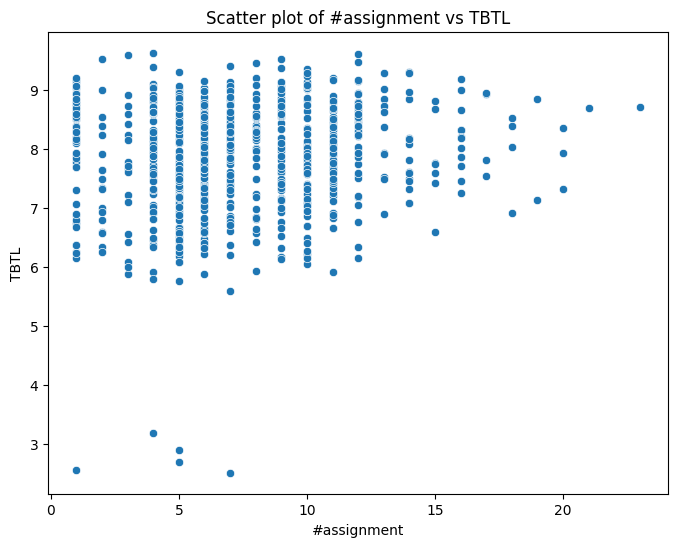

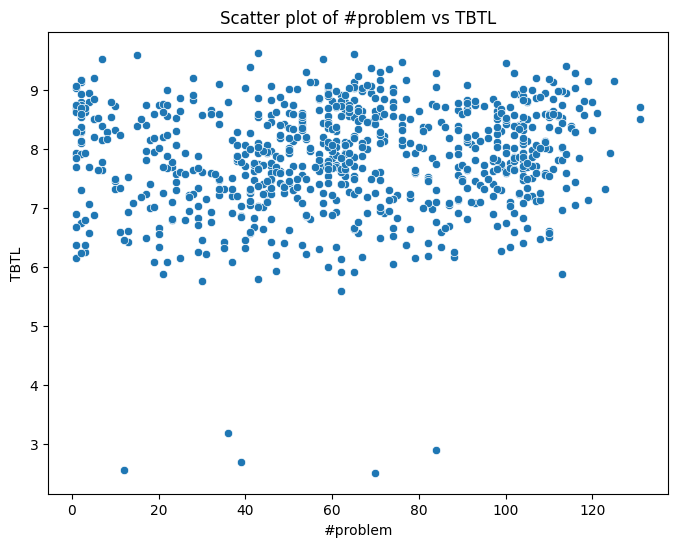

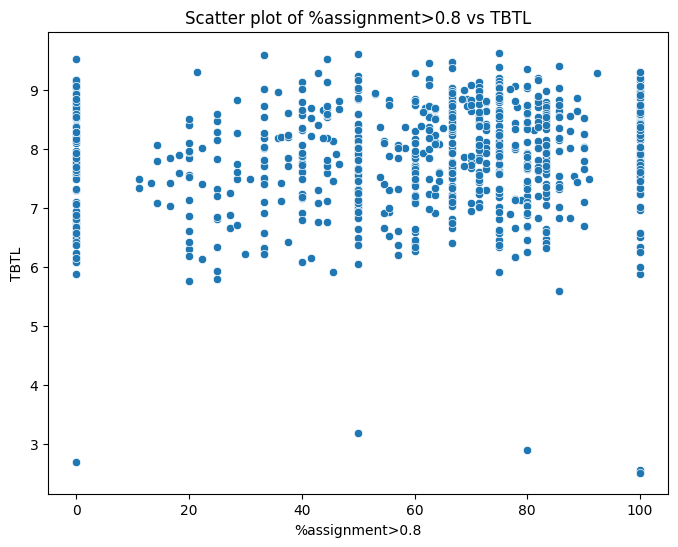

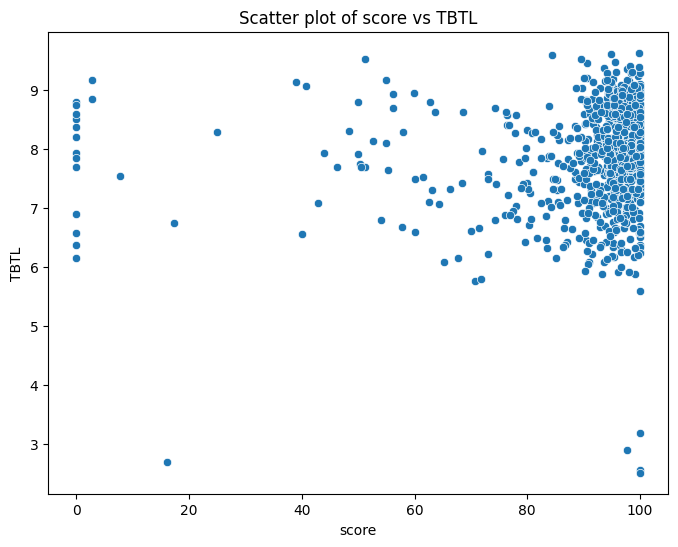

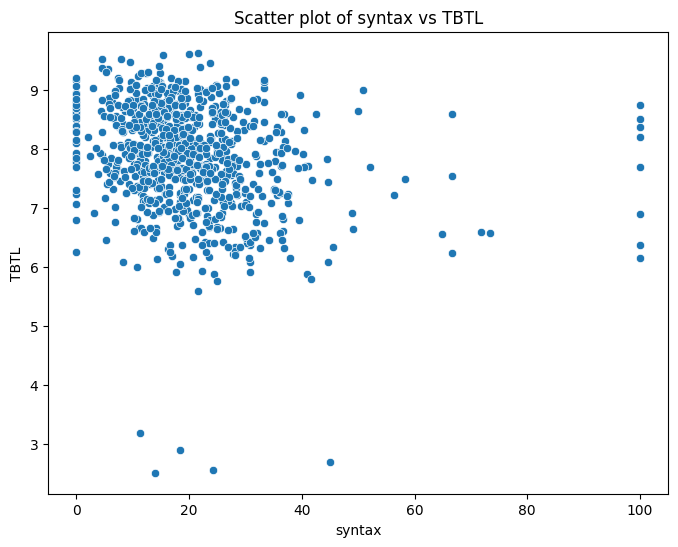

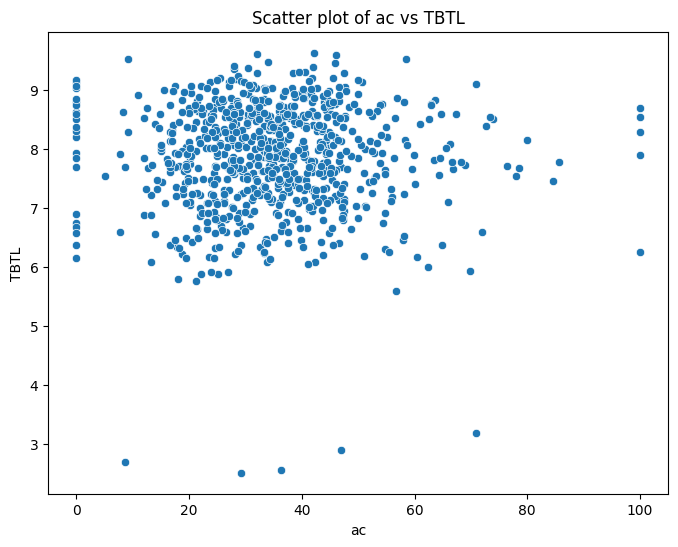

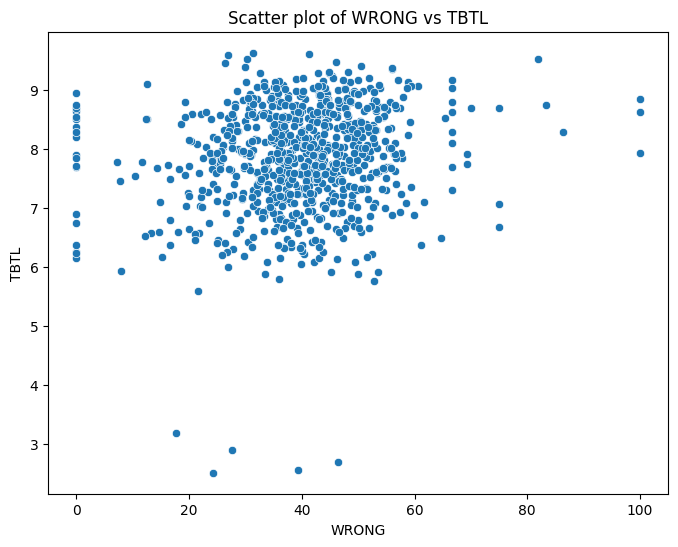

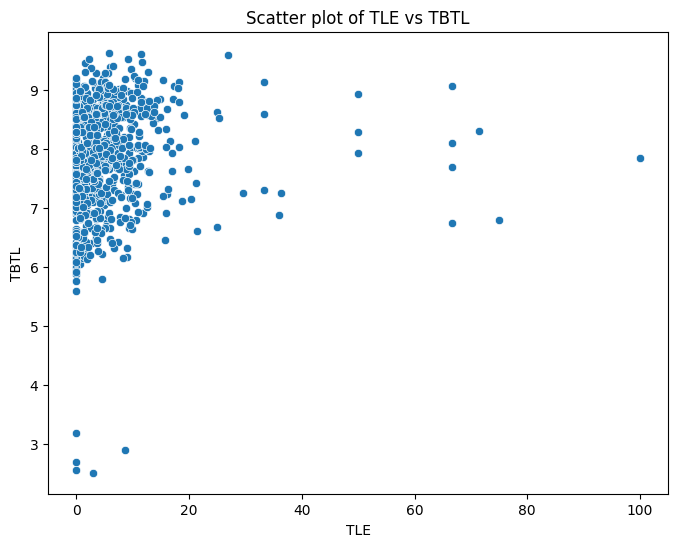

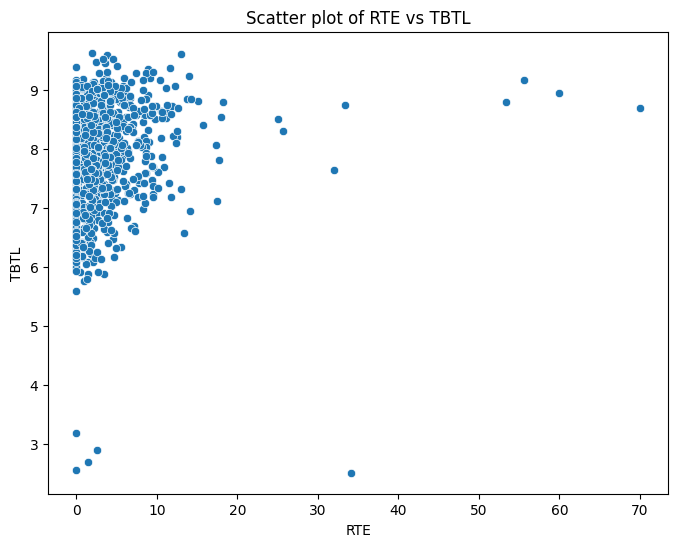

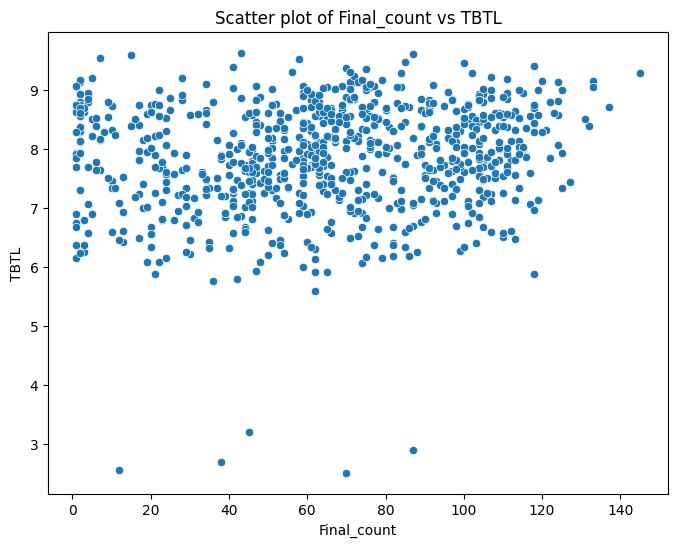

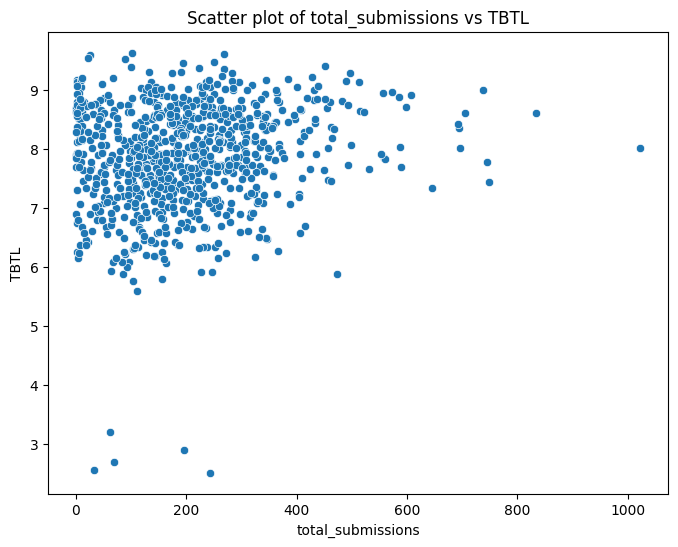

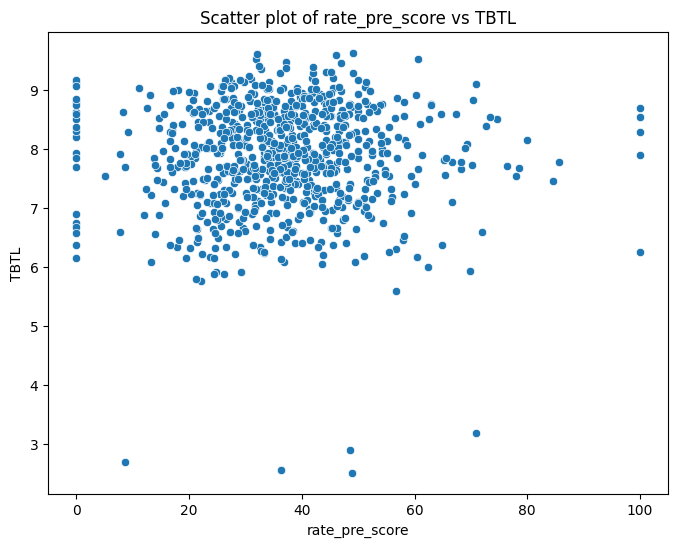

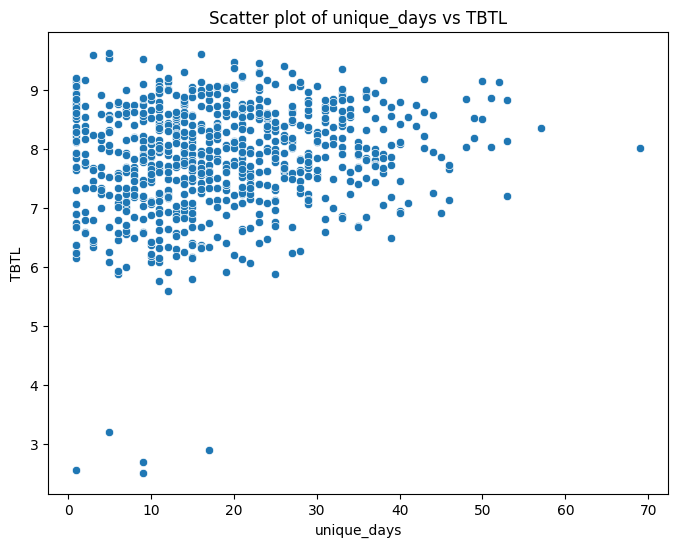

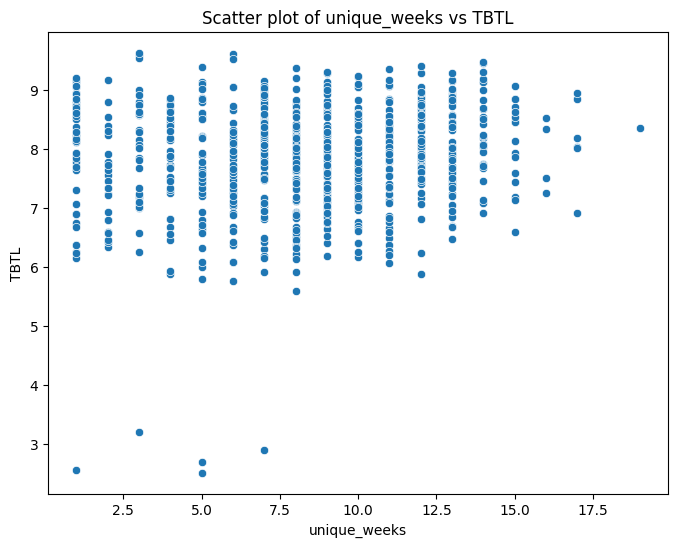

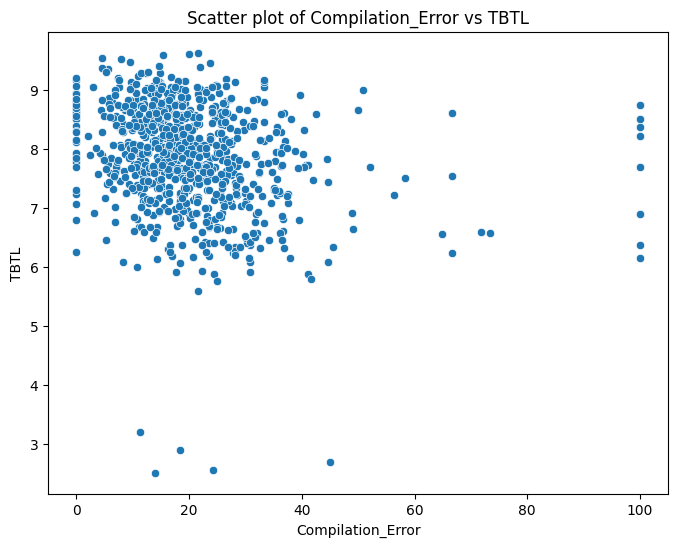

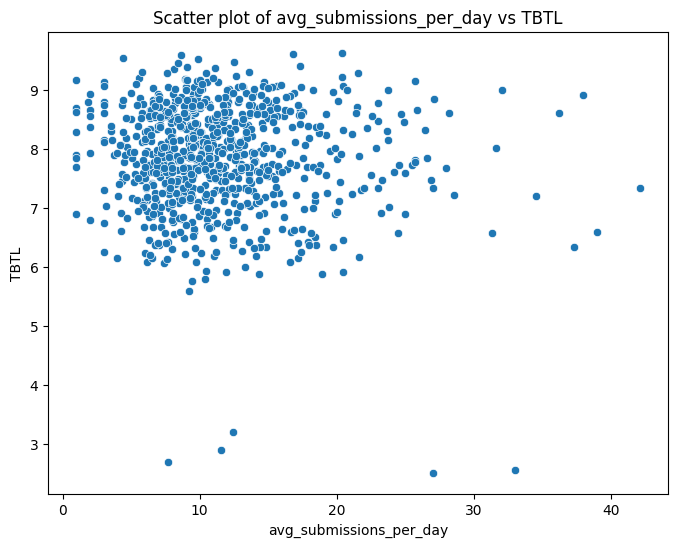

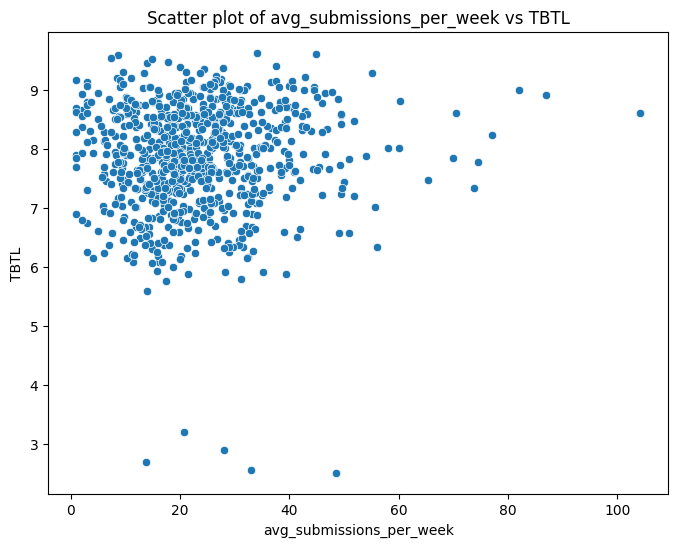

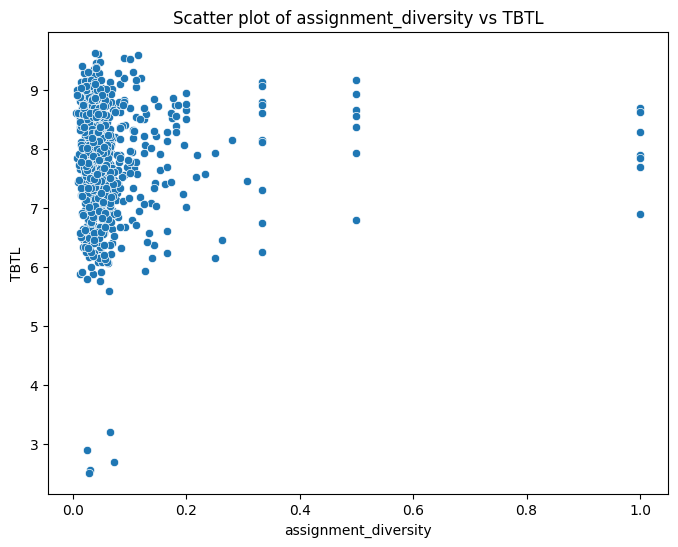

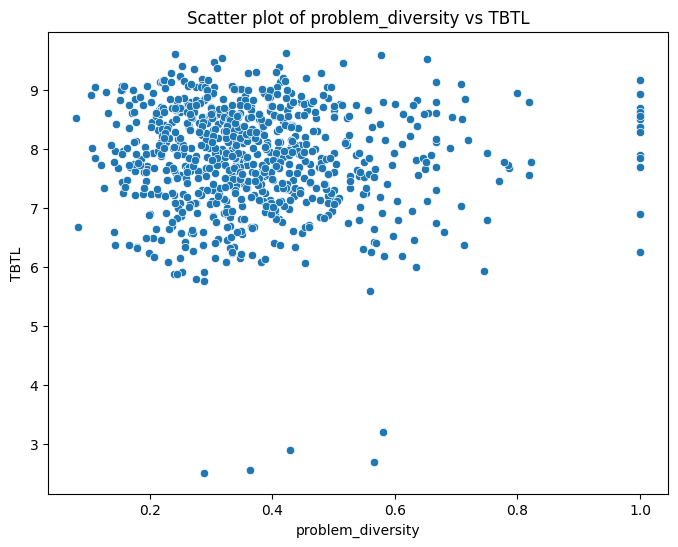

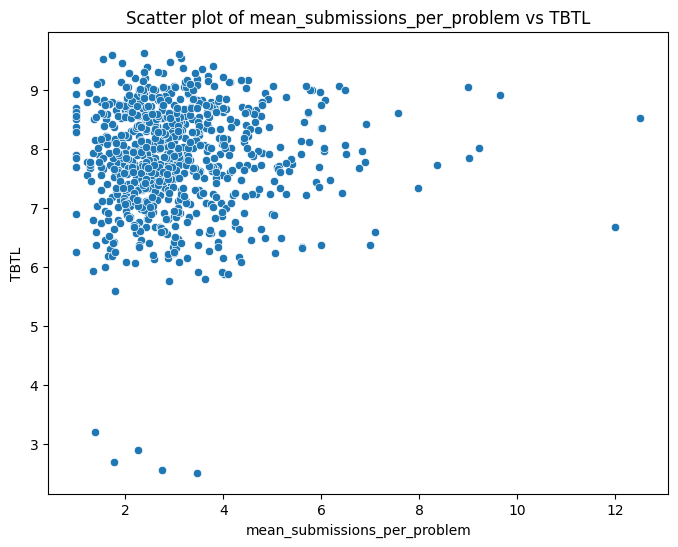

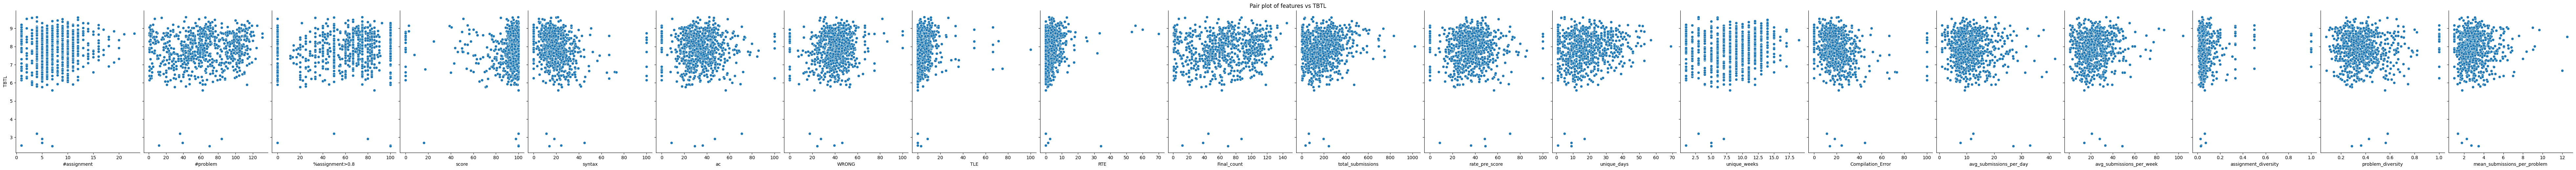

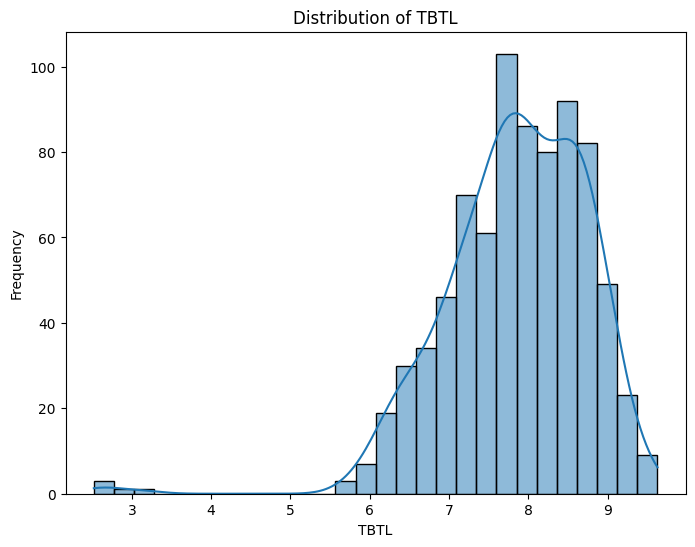

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 2: Xử lý dữ liệu để kết hợp thông tin từ cả hai file
tbtl_df.rename(columns={'username': 'username'}, inplace=True)
merged_df = pd.merge(data_df, tbtl_df, on='username', how='inner')

# Định nghĩa các đặc trưng (features) và nhãn (labels)
features = ['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'unique_days',
            'unique_weeks', 'Compilation_Error', 'avg_submissions_per_day',
            'avg_submissions_per_week', 'assignment_diversity', 'problem_diversity', 'mean_submissions_per_problem']
X = merged_df[features]
y = merged_df['TBTL']

# Biểu đồ phân tán của mỗi đặc trưng so với nhãn
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=merged_df[feature], y=y)
    plt.title(f'Scatter plot of {feature} vs TBTL')
    plt.xlabel(feature)
    plt.ylabel('TBTL')
    plt.show()

# Biểu đồ ma trận phân tán của tất cả các đặc trưng và nhãn
sns.pairplot(merged_df, x_vars=features, y_vars='TBTL', height=5, aspect=0.8)
plt.suptitle('Pair plot of features vs TBTL', y=1.02)
plt.show()

# Biểu đồ phân phối của nhãn (TBTL)
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of TBTL')
plt.xlabel('TBTL')
plt.ylabel('Frequency')
plt.show()

# Data preprocessing & Split

## TBTL

In [ ]:
# Data preprocessing
tbtl_df.rename(columns={'username': 'username'}, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username'
merged_df = pd.merge(data_df, tbtl_df, on='username', how='inner')

# Định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8',  'ac', 'WRONG', 'TLE','RTE']]
y = merged_df['TBTL']

## QT

In [ ]:
# Data preprocessing
qt_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, qt_df, on='username', how='inner')
merged_df['diemqt'] = merged_df['diemqt'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['diemqt'] = pd.to_numeric(merged_df['diemqt'], errors='coerce')
merged_df['diemqt'].fillna(0, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username' và định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error']]
y = merged_df['diemqt']

## CK

In [ ]:
# Data preprocessing
ck_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, ck_df, on='username', how='inner')
merged_df['CK'] = merged_df['CK'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['CK'] = pd.to_numeric(merged_df['CK'], errors='coerce')
merged_df['CK'].fillna(0, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username' và định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count', 'total_submissions']]
y = merged_df['CK']

## TH

In [ ]:
# Data preprocessing
th_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, th_df, on='username', how='inner')
merged_df['TH'] = merged_df['TH'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['TH'] = pd.to_numeric(merged_df['TH'], errors='coerce')
merged_df['TH'].fillna(0, inplace=True)

# Định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
y = merged_df['TH']

# Model

## LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
X['%assignment>0.8_2']=X['%assignment>0.8']**2
X['a']= X['#assignment']*X['#problem']
X['b'] = X['%assignment>0.8_2']*X['score']*X['ac']
#X['c'] = X['%assignment>0.8_2']*X['score']
X['d'] = X['#problem']**2
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'num_leaves': 21,
    'learning_rate': 0.05,
    'feature_fraction': 1.0
}

gbm = lgb.train(params, train_data, num_boost_round=50)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2718
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 18
[LightGBM] [Info] Start training from score 7.173520
Mean Squared Error: 3.466445968133467
R^2 Score: 0.31388875688122175


<ipython-input-16-1a441dabe1dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['%assignment>0.8_2']=X['%assignment>0.8']**2
<ipython-input-16-1a441dabe1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['a']= X['#assignment']*X['#problem']
<ipython-input-16-1a441dabe1dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
data_df = pd.merge(data_df, tbtl_df, on = 'username', how= 'inner')

# Bước 2: Xử lý dữ liệu để kết hợp thông tin từ cả hai file
# Đổi tên cột 'username' trong tbtl_df để dễ dàng merge
tbtl_df.rename(columns={'username': 'username'}, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username'
merged_df = pd.merge(data_df, tbtl_df, on='username', how='inner')

# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score','syntax',  'ac', 'WRONG', 'TLE', 'RTE']]
y = merged_df['TBTL_x']

X['%assignment>0.8_2']=X['%assignment>0.8']**2
X['a']= X['#assignment']*X['#problem']
X['b'] = X['%assignment>0.8_2']*X['score']*X['ac']
#X['c'] = X['%assignment>0.8_2']*X['score']
X['d'] = X['#problem']**2


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'num_leaves': 21,
    'learning_rate': 0.05,
    'feature_fraction': 0.1
}

gbm = lgb.train(params, train_data, num_boost_round=50)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score','syntax', 'ac', 'WRONG', 'TLE', 'RTE']]
all_X['%assignment>0.8_2']=all_X['%assignment>0.8']**2
all_X['a']= all_X['#assignment']*all_X['#problem']
all_X['b'] = all_X['%assignment>0.8_2']*all_X['score']*all_X['ac']
#all_X['c'] = all_X['%assignment>0.8_2']*all_X['score']
all_X['d'] = all_X['#problem']**2

_tbtl = gbm.predict(all_X)
#_tbtl = [round(score,2) for score in _tbtl]
# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _tbtl
})

# Xuất kết quả ra file CSV
result_df.to_csv('tbtl.csv', index=False)

print("Kết quả đã được lưu vào file 'tbtl.csv'")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 13
[LightGBM] [Info] Start training from score 7.843161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

<ipython-input-20-a496936472fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['%assignment>0.8_2']=X['%assignment>0.8']**2
<ipython-input-20-a496936472fe>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['a']= X['#assignment']*X['#problem']
<ipython-input-20-a496936472fe>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

## ADABOOST TBTL

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.02, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('adaboost', adaboost)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Bước 5: Dự đoán điểm tích lũy và đánh giá mô hình
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.9480549484858016
R^2 Score: 0.04321308146267466
Kết quả đã được lưu vào file 'tbtl.csv'


## AdaBoostRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.1, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('adaboost', adaboost)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Bước 5: Dự đoán điểm tích lũy và đánh giá mô hình
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.4838128436262434
R^2 Score: 0.06971950040841235
Kết quả đã được lưu vào file 'QT_Ada.csv'


## CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=5)
model1 = AdaBoostRegressor(base_model, n_estimators=200, learning_rate=0.1, random_state=42)
lgb_params = {
    'boosting_type': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.05,
    'metric': 'rmse',
    'num_leaves': 10,
    'objective': 'regression_l2'
}
model2 = lgb.LGBMRegressor(**lgb_params)
model3 =CatBoostRegressor(iterations=100,  # Số lượng cây quyết định (iterations)
                                   learning_rate=0.1,  # Tốc độ học (learning rate)
                                   depth=5,  # Độ sâu của cây quyết định (depth)
                                   loss_function='RMSE',  # Hàm mất mát (loss function)
                                   random_seed=42,  # Seed để tái tái lập (random seed)
                                   verbose=100
)

# Tạo mô hình Voting với ba mô hình cơ sở
voting_regressor = VotingRegressor([
    ('ada', model1),
    ('lgbm', model2),
    ('cat', model3)
])

# Huấn luyện mô hình Voting
voting_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = voting_regressor.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 13
[LightGBM] [Info] Start training from score 8.216283
0:	learn: 1.8783771	total: 50.2ms	remaining: 4.97s
99:	learn: 1.1591325	total: 908ms	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
Mean Squared Error: 3.3029136395198853
R^2 Score: 0.11802490874275229
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fractio

# Prediction

### TBTL

In [ ]:
# Dự đoán điểm tích lũy cho toàn bộ dữ liệu
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'ac', 'WRONG', 'TLE','RTE']]
_tbtl = pipeline.predict(all_X)

# Làm tròn score trong _tbtl 1 chữ số sau dấu thập phân
_tbtl_rounded = [round(score, 1) for score in _tbtl]

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _tbtl_rounded
})

# Xuất kết quả ra file CSV
result_df.to_csv('tbtl.csv', index=False)

print("Kết quả đã được lưu vào file 'tbtl.csv'")

### QT

In [ ]:
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', ]]
all_X['%assignment>0.8_2']=all_X['%assignment>0.8']**2
all_X['a']= all_X['#assignment']*all_X['#problem']
all_X['b'] = all_X['%assignment>0.8_2']*all_X['score']*all_X['ac']
#all_X['c'] = all_X['%assignment>0.8_2']*all_X['score']
all_X['d'] = all_X['#problem']**2
_QT = gbm.predict(all_X)

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _QT
})

# Xuất kết quả ra file CSV
result_df.to_csv('QT.csv', index=False)

print("Kết quả đã được lưu vào file 'QT.csv'")

#### QT2

In [ ]:
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error']]
_CK = pipeline.predict(all_X)

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _CK
})

# Xuất kết quả ra file CSV
result_df.to_csv('QT_Ada.csv', index=False)

print("Kết quả đã được lưu vào file 'QT_Ada.csv'")

### CK

In [ ]:
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count', 'total_submissions']]
all_X['%assignment>0.8_2']=all_X['%assignment>0.8']**2
all_X['a']= all_X['#assignment']*all_X['#problem']
all_X['b'] = all_X['%assignment>0.8_2']*all_X['score']*all_X['ac']
#all_X['c'] = all_X['%assignment>0.8_2']*all_X['score']
all_X['d'] = all_X['#problem']**2
_CK = gbm.predict(all_X)

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _CK
})

# Xuất kết quả ra file CSV
result_df.to_csv('CK.csv', index=False)

print("Kết quả đã được lưu vào file 'CK.csv'")

### TH

In [ ]:
# Dự đoán điểm tích lũy cho toàn bộ dữ liệu
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
_TH = pipeline.predict(all_X)

# Làm tròn score trong _tbtl 2 chữ số sau dấu thập phân
#_TH_rounded = [round(score, 2) for score in _tbtl]

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _TH
})

# Xuất kết quả ra file CSV
result_df.to_csv('th.csv', index=False)

print("Kết quả đã được lưu vào file 'th.csv'")

# Rounding

In [ ]:
# Đọc dữ liệu từ tệp CSV để làm tròn
round_data = pd.read_csv("/content/QT.csv")
round_data

,username,predicted_accumulated_score
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,8.677687
1,ba12c0a2cb367af0467e479c03507c71a805d291,8.874245
2,0bd2037bf68a97753e5e67ab55dac026a649f279,7.954354
3,b7298b0fe50443a623af9b56792b330c2d052845,8.820614
4,c60be70309789b39355dc612f36e37090ccad5dc,8.639338
...,...,...
1484,b722e6209f2858faf0bf80947cadcbde586bb666,7.808961
1485,02c88d535d7393d30ce3338174d0a17ee7e8b8cc,8.680684
1486,b45e8d507778dab56f381a681c453cbf4d3b4050,8.497373
1487,ea385e57f5d3d6841a6997dd7af680e135928bca,7.230623


In [ ]:
# Hàm tùy chỉnh để làm tròn điểm số
def custom_round(score):
    integer_part = int(score)
    decimal_part = score - integer_part
    if decimal_part < 0.25:
        return integer_part
    elif 0.25 <= decimal_part < 0.75:
        return integer_part + 0.5
    else:
        return integer_part + 1.0

# Áp dụng hàm tùy chỉnh vào cột "Score"
round_data["target"] = round_data["predicted_accumulated_score"].apply(custom_round)

In [ ]:
qt_test = round_data.drop("predicted_accumulated_score", axis=1)

In [ ]:
qt_test.to_csv("/content/qt_test.csv", index=False)

In [ ]:
# Đọc dữ liệu từ tệp CSV
round_data = pd.read_csv("/content/CK_test.csv")

# Làm tròn giá trị của cột predicted_accumulated_score đến chữ số thập phân thứ 3
round_data['predicted_accumulated_score'] = round_data['predicted_accumulated_score'].round(2)

# Hiển thị dữ liệu đã được làm tròn
print(round_data)

# Lưu lại dữ liệu đã được làm tròn vào tệp CSV mới (nếu cần)
round_data.to_csv("/content/CK_test_rounded.csv", index=False)

                                      username  predicted_accumulated_score
0     ed9eaeb6a707f50154024b24d7efcb874a9795dd                         5.21
1     ba12c0a2cb367af0467e479c03507c71a805d291                         5.73
2     0bd2037bf68a97753e5e67ab55dac026a649f279                         3.80
3     b7298b0fe50443a623af9b56792b330c2d052845                         6.10
4     c60be70309789b39355dc612f36e37090ccad5dc                         6.04
...                                        ...                          ...
1484  b722e6209f2858faf0bf80947cadcbde586bb666                         5.58
1485  02c88d535d7393d30ce3338174d0a17ee7e8b8cc                         5.67
1486  b45e8d507778dab56f381a681c453cbf4d3b4050                         5.12
1487  ea385e57f5d3d6841a6997dd7af680e135928bca                         2.37
1488  232cce96362898f08e9150ba244adaf2d6583ab2                         4.80

[1489 rows x 2 columns]


# Continue

## Model CK MAX-SCORE

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from sklearn.decomposition import PCA
# Bước 1: Đọc dữ liệu từ file data.csv và tbtl-public.ods
data_df = pd.read_csv(data)
ck_df = pd.read_csv(f'{dir}/public_it001/ck-public.csv')

# Step 2: Data preprocessing
ck_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, ck_df, on='username', how='inner')
merged_df['CK'] = merged_df['CK'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['CK'] = pd.to_numeric(merged_df['CK'], errors='coerce')
merged_df['CK'].fillna(0, inplace=True)

# Step 3: Split data into training and testing sets
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count', 'total_submissions']]
y = merged_df['CK']

X['%assignment>0.8_2']=X['%assignment>0.8']**2
X['a']= X['#assignment']*X['#problem']
X['b'] = X['%assignment>0.8_2']*X['score']*X['ac']
#X['c'] = X['%assignment>0.8_2']*X['score']
X['d'] = X['#problem']**2
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression_l2',
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'num_leaves': 21,
    'learning_rate': 0.05,
    'feature_fraction': 1.0
}

gbm = lgb.train(params, train_data, num_boost_round=50)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count', 'total_submissions']]
all_X['%assignment>0.8_2']=all_X['%assignment>0.8']**2
all_X['a']= all_X['#assignment']*all_X['#problem']
all_X['b'] = all_X['%assignment>0.8_2']*all_X['score']*all_X['ac']
#all_X['c'] = all_X['%assignment>0.8_2']*all_X['score']
all_X['d'] = all_X['#problem']**2
_CK = gbm.predict(all_X)

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _CK
})

# Xuất kết quả ra file CSV
result_df.to_csv('CK.csv', index=False)

print("Kết quả đã được lưu vào file 'CK.csv'")

## QT

In [ ]:
# Step 1: Read data from CSV files
data_df = pd.read_csv(data)
qt_df = pd.read_csv(qt)

# Step 2: Data preprocessing
qt_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, qt_df, on='username', how='inner')
merged_df['diemqt'] = merged_df['diemqt'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['diemqt'] = pd.to_numeric(merged_df['diemqt'], errors='coerce')
merged_df['diemqt'].fillna(7, inplace=True)

# Step 3: Split data into training and testing sets
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score', 'syntax', 'WRONG','Final_count','total_submissions', 'rate_pre_score']]
y = merged_df['diemqt']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=5)
model1 = AdaBoostRegressor(base_model, n_estimators=200, learning_rate=0.1, random_state=42)

lgb_params = {
    'boosting_type': 'gbdt',
    'feature_fraction': 1.0,
    'learning_rate': 0.05,
    'metric': 'rmse',
    'num_leaves': 21,
    'objective': 'regression_l2'
}
model2 = lgb.LGBMRegressor(**lgb_params)
model3 =CatBoostRegressor(iterations=100,  # Số lượng cây quyết định (iterations)
                                   learning_rate=0.1,  # Tốc độ học (learning rate)
                                   depth=15,  # Độ sâu của cây quyết định (depth)
                                   loss_function='RMSE',  # Hàm mất mát (loss function)
                                   random_seed=42,  # Seed để tái tái lập (random seed)
                                   verbose=100
)

# Tạo mô hình Voting với ba mô hình cơ sở
voting_regressor = VotingRegressor([
    ('ada', model1),
    ('lgb', model2),
    ('cat', model3)
])

# Huấn luyện mô hình Voting
voting_regressor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = voting_regressor.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict accumulated score for all data
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score', 'syntax', 'WRONG','Final_count','total_submissions', 'rate_pre_score']]
_qt = voting_regressor.predict(all_X)

# Round the predicted scores to 1 decimal place
_qt_rounded = [round(score, 1) for score in _qt]

# Create a DataFrame with username and predicted accumulated scores
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _qt_rounded
})

# Export the results to a CSV file
result_df.to_csv('qt.csv', index=False)

print("Kết quả đã được lưu vào file 'qt.csv'")

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1258
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 9
[LightGBM] [Info] Start training from score 8.273849
0:	learn: 1.7125100	total: 1.03s	remaining: 1m 42s
99:	learn: 0.4346213	total: 1m 43s	remaining: 0us
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
Mean Squared Error: 2.686259868921512
R^2 Score: 0.06458720746775848
[LightGBM] [Warning] feature_fraction is set=1.0, colsa

In [ ]:
X.shape

(761, 9)

## TBTL max

In [ ]:
# Bước 1: Đọc dữ liệu từ file data.csv và tbtl-public.ods
data_df = pd.read_csv(data)
tbtl_df = pd.read_excel(tbtl, engine='odf')

# Bước 2: Xử lý dữ liệu để kết hợp thông tin từ cả hai file
# Đổi tên cột 'username' trong tbtl_df để dễ dàng merge
tbtl_df.rename(columns={'username': 'username'}, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username'
merged_df = pd.merge(data_df, tbtl_df, on='username', how='inner')

# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
y = merged_df['TBTL']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.02, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('adaboost', adaboost)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Bước 5: Dự đoán điểm tích lũy và đánh giá mô hình
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Dự đoán điểm tích lũy cho toàn bộ dữ liệu
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
_tbtl = pipeline.predict(all_X)

# Làm tròn score trong _tbtl 2 chữ số sau dấu thập phân
_tbtl_rounded = [round(score, 2) for score in _tbtl]

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _tbtl_rounded
})

# Xuất kết quả ra file CSV
result_df.to_csv('tbtl.csv', index=False)

print("Kết quả đã được lưu vào file 'tbtl.csv'")

Mean Squared Error: 0.9527192492027821
R^2 Score: 0.0385058206469816
Kết quả đã được lưu vào file 'tbtl.csv'


## TH Max

In [ ]:
# Bước 1: Đọc dữ liệu từ file data.csv và tbtl-public.ods
data_df = pd.read_csv(data)
th_df = pd.read_excel(tbtl, engine='odf')

# Bước 2: Xử lý dữ liệu để kết hợp thông tin từ cả hai file
# Đổi tên cột 'username' trong tbtl_df để dễ dàng merge
th_df.rename(columns={'username': 'username'}, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username'
merged_df = pd.merge(data_df, th_df, on='username', how='inner')

# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
y = merged_df['TBTL']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeRegressor(max_depth=3)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.02, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('adaboost', adaboost)
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Bước 5: Dự đoán điểm tích lũy và đánh giá mô hình
y_pred = pipeline.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Dự đoán điểm tích lũy cho toàn bộ dữ liệu
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error', 'mean_submissions_per_problem']]
_TH = pipeline.predict(all_X)

# Làm tròn score trong _tbtl 2 chữ số sau dấu thập phân
#_TH_rounded = [round(score, 2) for score in _tbtl]

# Tạo DataFrame chứa username và điểm tích lũy dự đoán
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': _TH
})

# Xuất kết quả ra file CSV
result_df.to_csv('th.csv', index=False)

print("Kết quả đã được lưu vào file 'th.csv'")

Mean Squared Error: 0.9527192492027821
R^2 Score: 0.0385058206469816
Kết quả đã được lưu vào file 'th.csv'


In [ ]:
data_df.isna().sum()

username                        0
#assignment                     0
#problem                        0
%assignment>0.8                 0
score                           0
syntax                          0
ac                              0
WRONG                           0
TLE                             0
RTE                             0
Final_count                     0
total_submissions               0
rate_pre_score                  0
unique_days                     0
unique_weeks                    0
Compilation_Error               0
avg_submissions_per_day         0
avg_submissions_per_week        0
assignment_diversity            0
problem_diversity               0
mean_submissions_per_problem    0
dtype: int64

## Tree-Based Methods && GridSearch find parameter best for model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Step 1: Read data from CSV files
data_df = pd.read_csv(data)
qt_df = pd.read_csv(qt)

# Step 2: Data preprocessing
qt_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, qt_df, on='username', how='inner')
merged_df['diemqt'] = merged_df['diemqt'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['diemqt'] = pd.to_numeric(merged_df['diemqt'], errors='coerce')
merged_df['diemqt'].fillna(7, inplace=True)

# Step 3: Split data into training and testing sets
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score', 'syntax', 'WRONG','Final_count','total_submissions', 'rate_pre_score']]
y = merged_df['diemqt']

In [ ]:
X.shape, y.shape

((761, 9), (761,))

In [ ]:
sc_X = StandardScaler()
# .fit only compute the mean and the standard deviation
X_scale = sc_X.fit_transform(X)

In [ ]:
sc_y = StandardScaler()
y_scale = sc_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.2, random_state=42)

In [ ]:
# Define the base models
catboost_model = CatBoostRegressor(silent=True)
adaboost_model = AdaBoostRegressor()
bagging_model = BaggingRegressor()

In [ ]:
# Define the models
models = {
    'CatBoost': catboost_model,
    'AdaBoost': adaboost_model,
    'Bagging': bagging_model,
    'VotingRegressor': VotingRegressor(estimators=[
        ('catboost', catboost_model),
        ('adaboost', adaboost_model)
    ])
}

# Define the hyperparameter grids for each model
param_grids = {
    'CatBoost': {
        'depth': [4, 6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [1, 3, 5, 7, 9]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'loss': ['linear', 'square', 'exponential']
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_boost = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    if model_name in param_grids:
        grids_boost[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
        grids_boost[model_name].fit(X_train, y_train.ravel())
        best_params = grids_boost[model_name].best_params_
        best_score = -1 * grids_boost[model_name].best_score_
        print(f'Best parameters for {model_name}: {best_params}')
    else:
        # Directly fit VotingRegressor without hyperparameter tuning
        model.fit(X_train, y_train.ravel())
        best_score = mean_squared_error(y_test, model.predict(X_test))
        grids_boost['VotingRegressor'] = model
    print(f'Best MSE for {model_name}: {best_score}\n')

# Predict the outcomes for the test set
for model_name, grid_search in grids_boost.items():
    y_pred = grid_search.predict(X_test)
    y_pred_inv = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y_test_inv = sc_y.inverse_transform(y_test)

    mse = mean_squared_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    print(f'{model_name} - Mean Squared Error: {mse}')
    print(f'{model_name} - R^2 Score: {r2}')


Training and tuning CatBoost...
Fitting 3 folds for each of 180 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters for CatBoost: {'depth': 10, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
Best MSE for CatBoost: 0.8755749818562798

Training and tuning AdaBoost...
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best parameters for AdaBoost: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
Best MSE for AdaBoost: 0.9190073521290957

Training and tuning Bagging...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Bagging: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}
Best MSE for Bagging: 0.9016340023138324

Training and tuning VotingRegressor...
Best MSE for VotingRegressor: 0.9645347171084763

CatBoost - Mean Squared Error: 2.658954187703798
CatBoost - R^2 Score: 0.07409562614882648
AdaBoost - Mean Squared Error: 2.8712361095733345
AdaBoost - R^2 Score: 0.00017454813346029496
Bagging - Mean Squared Error: 2.4168477787964977
Bagging - R^2 Score: 0.15840222457813413
VotingRegressor - Mean Square

In [ ]:
# Predict the accumulated scores for the entire dataset
all_X = data_df[['#assignment', '#problem', '%assignment>0.8', 'score', 'syntax', 'WRONG','Final_count','total_submissions', 'rate_pre_score']]
all_X_scale = sc_X.transform(all_X)

# Predict using the best model (e.g., VotingRegressor)
best_model = grids_boost['VotingRegressor']
all_y_pred = best_model.predict(all_X_scale)
all_y_pred_inv = sc_y.inverse_transform(all_y_pred.reshape(-1, 1))

# Create DataFrame with usernames and predicted accumulated scores
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': all_y_pred_inv.flatten()
})

# Export the results to a CSV file
result_df.to_csv('QT.csv', index=False)

print("Kết quả đã được lưu vào file 'QT.csv'")

Kết quả đã được lưu vào file 'QT.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
# Step 1: Read data from CSV files

# Step 2: Data preprocessing
qt_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, qt_df, on='username', how='inner')
merged_df['diemqt'] = merged_df['diemqt'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['diemqt'] = pd.to_numeric(merged_df['diemqt'], errors='coerce')
merged_df['diemqt'].fillna(0, inplace=True)

# Step 3: Split data into training and testing sets
X_CK = merged_df[['#assignment', '#problem','syntax',  'ac', 'WRONG', 'TLE', 'RTE']]
y_CK = merged_df['diemqt']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_CK, y_CK, test_size=0.1, random_state=42)

# Initialize the models

#knn = KNeighborsRegressor(n_neighbors=12)  # Example with 5 neighbors
catboost = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=8,l2_leaf_reg =7,silent=False)
base_model = DecisionTreeRegressor(max_depth=5)
adaboost = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.02, random_state=42)
# Định nghĩa các tham số cần tìm kiếm


# Tạo mô hình LightGBM
lgb_estimator = lgb.LGBMRegressor(reg_alpha=0.2,num_leaves = 20,max_depth=10,learning_rate= 0.02,feature_fraction= 0.5,boosting_type='gbdt',objective='regression_l2',metric='mse')


# Create a voting regressor that combines the predictions of the three models
voting_reg = VotingRegressor(estimators=[ ('catboost', catboost),('lightgbm', lgb_estimator)])
#('knn',knn),,('adaboost',adaboost),
# Train the voting regressor
voting_reg.fit(X_train, y_train)

# Make predictions with the voting regressor
y_pred = voting_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict accumulated scores for all data
all_X = data_df[['#assignment', '#problem','syntax',   'ac', 'WRONG', 'TLE', 'RTE']]

predicted_scores = voting_reg.predict(all_X)

# Round the predicted scores to one decimal place


# Create DataFrame with username and predicted accumulated scores
result_df = pd.DataFrame({
    'username': data_df['username'],
    'predicted_accumulated_score': predicted_scores
})

# Export results to CSV
result_df.to_csv('CK.csv', index=False)

print("Kết quả đã được lưu vào file 'CK.csv'")


0:	learn: 1.8740524	total: 66.5ms	remaining: 6.58s
1:	learn: 1.8666772	total: 79.7ms	remaining: 3.9s
2:	learn: 1.8556685	total: 93.8ms	remaining: 3.03s
3:	learn: 1.8447750	total: 109ms	remaining: 2.63s
4:	learn: 1.8349387	total: 124ms	remaining: 2.35s
5:	learn: 1.8266587	total: 143ms	remaining: 2.24s
6:	learn: 1.8186133	total: 161ms	remaining: 2.14s
7:	learn: 1.8108819	total: 174ms	remaining: 2s
8:	learn: 1.8009040	total: 187ms	remaining: 1.89s
9:	learn: 1.7918500	total: 202ms	remaining: 1.82s
10:	learn: 1.7838320	total: 215ms	remaining: 1.74s
11:	learn: 1.7740313	total: 227ms	remaining: 1.67s
12:	learn: 1.7649899	total: 238ms	remaining: 1.59s
13:	learn: 1.7581534	total: 252ms	remaining: 1.54s
14:	learn: 1.7490445	total: 263ms	remaining: 1.49s
15:	learn: 1.7410625	total: 276ms	remaining: 1.45s
16:	learn: 1.7330591	total: 289ms	remaining: 1.41s
17:	learn: 1.7256985	total: 308ms	remaining: 1.4s
18:	learn: 1.7190478	total: 319ms	remaining: 1.36s
19:	learn: 1.7126368	total: 332ms	remaining

# Đặc trưng phù hợp cho bài toán

In [ ]:
# Data preprocessing
qt_df.rename(columns={'hash': 'username'}, inplace=True)
merged_df = pd.merge(data_df, qt_df, on='username', how='inner')
merged_df['diemqt'] = merged_df['diemqt'].astype(str).str.replace('\xa0', '').str.strip()
merged_df['diemqt'] = pd.to_numeric(merged_df['diemqt'], errors='coerce')
merged_df['diemqt'].fillna(0, inplace=True)

# Kết hợp dữ liệu dựa trên cột 'username' và định nghĩa các đặc trưng (features) và nhãn (labels)
X = merged_df[['#assignment', '#problem', '%assignment>0.8', 'score',
            'syntax', 'ac', 'WRONG', 'TLE', 'RTE','Final_count',
            'total_submissions', 'rate_pre_score', 'Compilation_Error']]
y = merged_df['diemqt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_params = {
    'SVM': {'C': 1, 'epsilon': 0.6, 'gamma': 'scale', 'kernel': 'rbf'},
    'RandomForest': {'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 900},
    'XGBoost': {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 100},
    'KNN': {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'},
    'LightGBM': {'n_estimators': 300, 'learning_rate': 0.1, 'num_leaves': 30},  # Assuming some best params for LightGBM
    'GradientBoosting': {'n_estimators': 400, 'learning_rate': 0.1, 'max_depth': 3}  # Assuming some best params for GradientBoosting
}

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo các mô hình với các tham số tốt nhất
models = {
    'SVM': SVR(**best_params['SVM']),
    'RandomForest': RandomForestRegressor(**best_params['RandomForest']),
    'XGBoost': XGBRegressor(**best_params['XGBoost']),
    'KNN': KNeighborsRegressor(**best_params['KNN']),
    'LightGBM': LGBMRegressor(**best_params['LightGBM']),
    'GradientBoosting': GradientBoostingRegressor(**best_params['GradientBoosting'])
}

# Huấn luyện các mô hình
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)
    print(f'{model_name} training completed.\n')

Training SVM...
SVM training completed.

Training RandomForest...
RandomForest training completed.

Training XGBoost...
XGBoost training completed.

Training KNN...
KNN training completed.

Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1984
[LightGBM] [Info] Number of data points in the train set: 608, number of used features: 13
[LightGBM] [Info] Start training from score 8.216283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} R^2: {r2}')
    print(f'{model_name} MSE: {mse}\n')

SVM R^2: -0.012665772873974968
SVM MSE: 3.792337931825818

RandomForest R^2: 0.04599653646360413
RandomForest MSE: 3.5726531090258606

XGBoost R^2: 0.12984775750284294
XGBoost MSE: 3.258638184561153

KNN R^2: 0.04994238209356494
KNN MSE: 3.5578762888187736

LightGBM R^2: -0.06106480975891704
LightGBM MSE: 3.9735877660348833

GradientBoosting R^2: -0.04080904744262015
GradientBoosting MSE: 3.8977318441425766

